In [7]:
# use random forest method to better result 
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Load the dataset
df = pd.read_csv("humidity.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701548 entries, 0 to 701547
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    701548 non-null  int64  
 1   lat          701548 non-null  float64
 2   lon          701548 non-null  float64
 3   pressure     701548 non-null  float64
 4   temperature  701548 non-null  float64
 5   humidity     701548 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 32.1 MB


,sensor_id,lat,lon,pressure,temperature,humidity
0,2266,42.738,23.272,95270.27,23.46,62.48
1,2292,42.663,23.273,94355.83,23.06,59.46
2,3096,42.700,23.360,95155.81,26.53,44.38
3,3428,42.624,23.406,94679.57,28.34,38.28
4,3472,42.669,23.318,94327.88,26.31,46.37


In [11]:
#Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Optionally, check percentage of missing values
print("\nPercentage of missing values per column:")
print((df.isnull().sum() / len(df)) * 100)
# clean data 

Missing values per column:
sensor_id      0
lat            0
lon            0
pressure       0
temperature    0
humidity       0
dtype: int64

Percentage of missing values per column:
sensor_id      0.0
lat            0.0
lon            0.0
pressure       0.0
temperature    0.0
humidity       0.0
dtype: float64


In [13]:
# Display summary statistics of numerical columns
print("Summary Statistics:")
print(df.describe())

# If you also want statistics for categorical columns:
print("\nIncluding categorical columns:")
print(df.describe(include='all'))


Summary Statistics:
           sensor_id            lat            lon       pressure  \
count  701548.000000  701548.000000  701548.000000  701548.000000   
mean     2835.419842      42.679722      23.333739   94965.292500   
std       798.018890       0.025568       0.039365    2577.210945   
min      1764.000000      42.622000      23.240000       0.000000   
25%      2224.000000      42.665000      23.310000   94528.017500   
50%      2323.000000      42.685000      23.332000   95005.480000   
75%      3474.000000      42.694000      23.360000   95405.132500   
max      4661.000000      42.738000      23.419000  164926.750000   

         temperature       humidity  
count  701548.000000  701548.000000  
mean       24.754990      48.348949  
std        14.013001      20.907247  
min      -145.120000       0.000000  
25%        20.630000      34.140000  
50%        24.780000      48.350000  
75%        29.870000      62.940000  
max        61.170000     100.000000  

Including categ

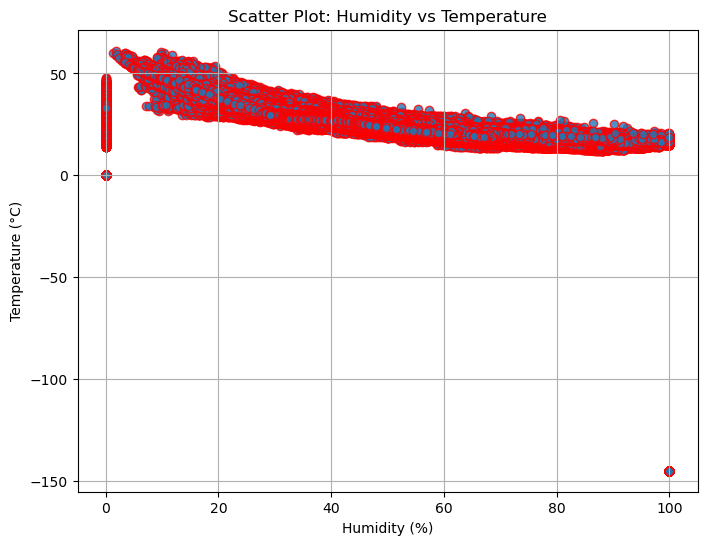

In [15]:
# Scatter plot to observe relationship
import matplotlib.pyplot as plt

# Scatter plot between Humidity and Temperature
plt.figure(figsize=(8,6))
plt.scatter(df['humidity'], df['temperature'], alpha=0.8, edgecolors='r')
plt.xlabel('Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.title('Scatter Plot: Humidity vs Temperature')
plt.grid(True)
plt.show()


In [19]:
from sklearn.model_selection import train_test_split

# 1. Drop any rows with missing values
df = df.dropna()

# 2. Define features (Humidity) and target (Temperature)
# 👉 Replace with your actual column names
X = df[['humidity']]   # feature(s)
y = df['temperature']  # target

# 3. Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 561238
Testing set size: 140310


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train (fit) the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")


Random Forest Model Evaluation Metrics:
Mean Absolute Error (MAE): 2.16
Mean Squared Error (MSE): 16.90
Root Mean Squared Error (RMSE): 4.11
R² Score: 0.91
